# Amazon Customer Reviews Data Analysis Project

![image info](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Amazon_logo.svg/800px-Amazon_logo.svg.png)

### *Importing the Libraries*

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### *Importing the Dataset*

In [204]:
crude_Df = pd.read_csv("Reviews.csv")

In [205]:
crude_Df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Getting Basic Information about the Dataset

In [206]:
crude_Df.shape

(568454, 10)

In [207]:
crude_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [208]:
crude_Df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


### Checking Null records in the Dataset

In [209]:
crude_Df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [210]:
crude_Df = crude_Df.dropna()

In [211]:
crude_Df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

### Copying the cleaned data into a new DataFrame

In [212]:
review_df = crude_Df.copy()

In [213]:
review_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Cleaning the Summary column

In [214]:
## Converting the Summary Columns into Lowercase
review_df['Summary'] = review_df['Summary'].str.lower()

In [215]:
review_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,Great taffy at a great price. There was a wid...


In [216]:
## Importing Regex Library
import re

In [217]:
# Storing a sample record from the Summary Column into the text
sample = review_df['Summary'][2]
sample

'"delight" says it all'

In [218]:
## Removing the puncutation in the record by passing it to the method

re.sub(r'[^\w\s]', '', sample)

'delight says it all'

In [219]:
# Creating a for loop to remove the puncuation from all the records and then stroing it into a new series
Clean_Summary = []
for char in review_df['Summary']:
    Clean_Summary.append(re.sub(r'[^\w\s]', '', char))

In [220]:
len(Clean_Summary)

568411

In [221]:
review_df['Clean_Summary'] = Clean_Summary 

In [222]:
review_df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,I have bought several of the Vitality canned d...,good quality dog food


### Performing Sentiment Analysis on Summary Column

In [223]:
# pip install textblob

In [224]:
## Importing TextBlob Library

from textblob import TextBlob

In [225]:
## Storing a sample record from the Summary Column into the sample

sample=review_df['Clean_Summary'][0]
sample

'good quality dog food'

In [226]:
## Testing out the Sentiment Analysis on the text

TextBlob(sample).sentiment.polarity

0.7

In [227]:
## Creating a for loop to find the Sentiment of all the records and then stroing it into a new series

summary_polarity = []

for i in review_df['Clean_Summary']:
    summary_polarity.append(TextBlob(i).sentiment.polarity)

In [228]:
## Checking the lenght of the series

len(summary_polarity)

568411

In [229]:
review_df['SummaryPolarity'] = summary_polarity

In [230]:
review_df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,I have bought several of the Vitality canned d...,good quality dog food,0.7


### Performing EDA for Positive Reviews

In [231]:
## Creating a new DataFrame for all the Positive Reviews Records 

positive_review_df = review_df[review_df['SummaryPolarity'] > 0]

In [232]:
positive_review_df.shape

(331262, 12)

In [233]:
positive_review_df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,I have bought several of the Vitality canned d...,good quality dog food,0.7


In [234]:
# pip install wordcloud

In [235]:
## Importing the Wordcloud Library

from wordcloud import WordCloud,STOPWORDS

In [236]:
## Storing the set of all the stopwords in a variable

stop_words=set(STOPWORDS)

In [237]:
## Creating new variable where all the records of Summary Column from Positive Review Dataset will be arranged one after the other
positive_summary = (' '.join(positive_review_df['Clean_Summary']))

In [238]:
## Checking the length of the series

len(positive_summary)

8151172

In [239]:
## Printing the 1st 1000 words of the positive summary
positive_summary[0:1000]

'good quality dog food great taffy nice taffy great  just as good as the expensive brands wonderful tasty taffy healthy dog food the best hot sauce in the world my cats love this diet food better than their regular food my cats are not fans of the new food fresh and greasy love it great sweet candy always fresh delicious product great bargain for the price the best hot sauce in the world great machine best of the instant oatmeals good instant great irish oatmeal for those in a hurry satisfying love gluten free oatmeal good way to start the day wifes favorite breakfast why wouldnt you buy oatmeal from mcanns tastes great good hot breakfast great taste and convenience good very good but next time i wont order the variety pack hot  and good  came back for more   roasts up a smooth brew our guests love it awesome deal awsome  kids in neighborhood loved us great deal better price for this at target great source of electrolytes great for preventing cramps taste is not so good how much would 

In [240]:
## Removing Extra Spaces in the words of the positive summary
positive_summary= re.sub(' +',' ',positive_summary)

In [241]:
## Checking the 1st 1000 words of the positive summary
positive_summary[0:1000]

'good quality dog food great taffy nice taffy great just as good as the expensive brands wonderful tasty taffy healthy dog food the best hot sauce in the world my cats love this diet food better than their regular food my cats are not fans of the new food fresh and greasy love it great sweet candy always fresh delicious product great bargain for the price the best hot sauce in the world great machine best of the instant oatmeals good instant great irish oatmeal for those in a hurry satisfying love gluten free oatmeal good way to start the day wifes favorite breakfast why wouldnt you buy oatmeal from mcanns tastes great good hot breakfast great taste and convenience good very good but next time i wont order the variety pack hot and good came back for more roasts up a smooth brew our guests love it awesome deal awsome kids in neighborhood loved us great deal better price for this at target great source of electrolytes great for preventing cramps taste is not so good how much would you pa

### WordCloud of all the Positive Reviews Data

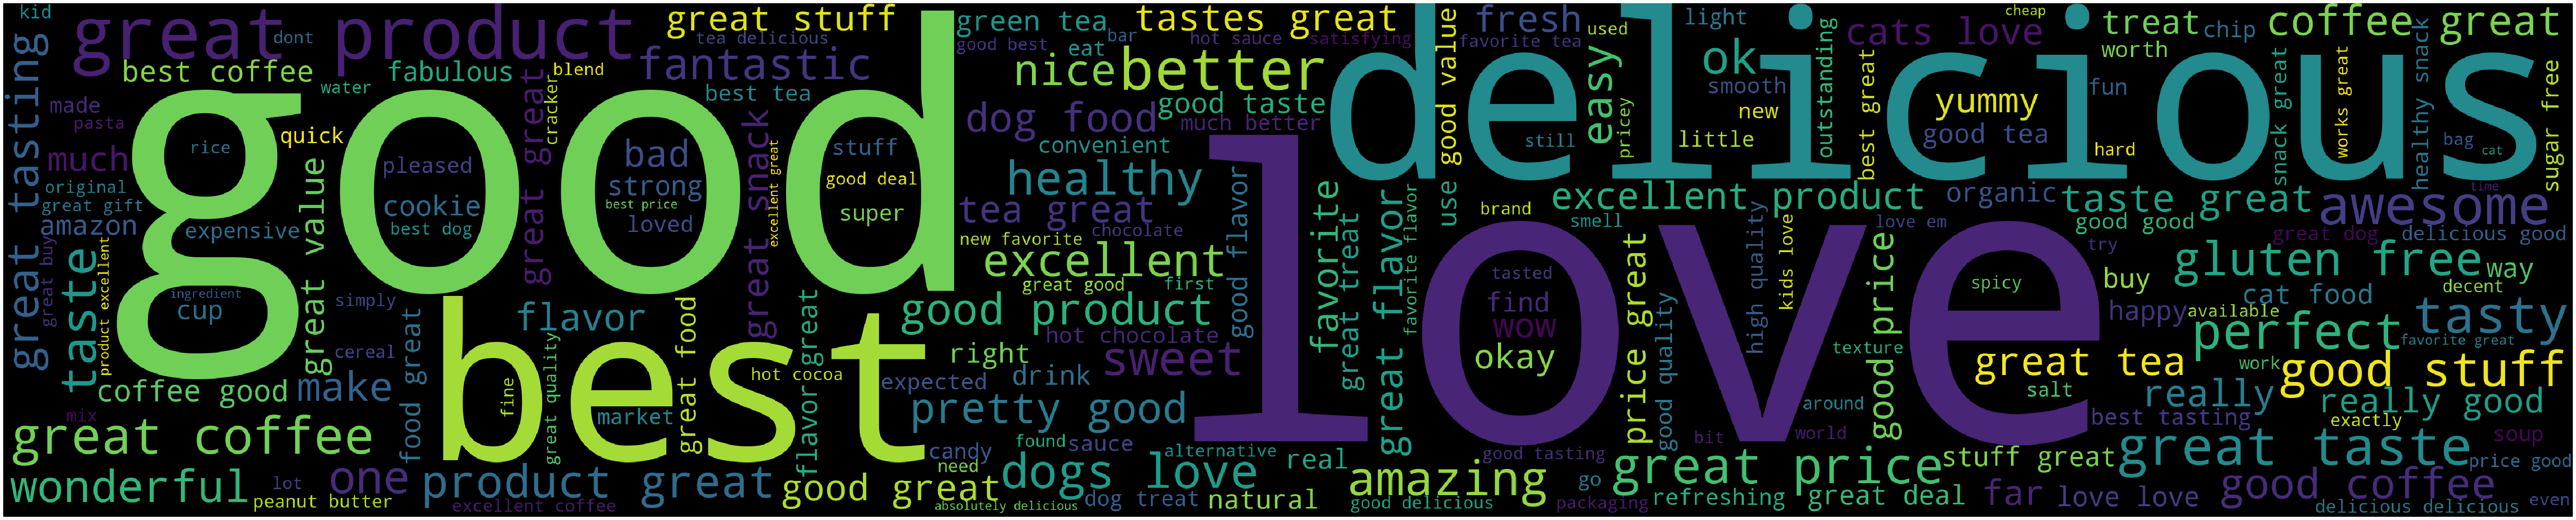

In [242]:
plt.figure(figsize=(100,100))

wordcloud_positive= WordCloud(width=5000, height=1000, stopwords=stop_words).generate(positive_summary)
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

### Performing EDA for Negative Reviews

In [243]:
## Creating a new DataFrame for all the Negative Reviews Records 
negative_review_df = review_df[review_df['SummaryPolarity']<0]

In [244]:
negative_review_df.shape

(52311, 12)

In [245]:
negative_review_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,poor taste,-0.400
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,nasty no flavor,"The candy is just red , No flavor . Just plan...",nasty no flavor,-1.000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,how can you go wrong!,"It is chocolate, what can I say. Great variet...",how can you go wrong,-0.500
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",pretty expensive,-0.125
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,stale product,-0.500


In [246]:
## Creating new variable where all the records of Summary Column from negative Review Dataset will be arranged one after the other
negative_summary = (' '.join(negative_review_df['Clean_Summary']))

In [247]:
negative_summary[0:1000]

'poor taste nasty no flavor how can you go wrong pretty expensive stale product bigger then other brands order only in cold weather bad disappointing my every day green tea broken bottle bottoms tasteless but low calorie marleys mellow mood lite  half tea half lemonade nearly killed the cats changed formula makes cats sick not a real tea mcclures bloody mary mix not good eukanuba puppy small breed dog food my everyday cup of tea disappointed sad outcome dont waste your money disappointed sugar in the raw good product but terrible agricultural practices sugar in the raw sugar in the raw too expensive not sure so awful i can barely describe awful bitter a saving grace for green mountain coffee fantastic chicken noodle soup heinz no more disappointing waste of money ham base msg ham base love the product disappointed in the shipping poor item packaging awful disappointing hard a slight taste of jalapeno heavy on the vinegar these chips make me weak at the knees not bad but a little hard t

In [248]:
## Removing Extra Spaces in the words of the negative summary
negative_summary = re.sub(' +',' ',negative_summary)

In [249]:
negative_summary[0:1000]

'poor taste nasty no flavor how can you go wrong pretty expensive stale product bigger then other brands order only in cold weather bad disappointing my every day green tea broken bottle bottoms tasteless but low calorie marleys mellow mood lite half tea half lemonade nearly killed the cats changed formula makes cats sick not a real tea mcclures bloody mary mix not good eukanuba puppy small breed dog food my everyday cup of tea disappointed sad outcome dont waste your money disappointed sugar in the raw good product but terrible agricultural practices sugar in the raw sugar in the raw too expensive not sure so awful i can barely describe awful bitter a saving grace for green mountain coffee fantastic chicken noodle soup heinz no more disappointing waste of money ham base msg ham base love the product disappointed in the shipping poor item packaging awful disappointing hard a slight taste of jalapeno heavy on the vinegar these chips make me weak at the knees not bad but a little hard to

### WordCloud of all the Negative Reviews Data

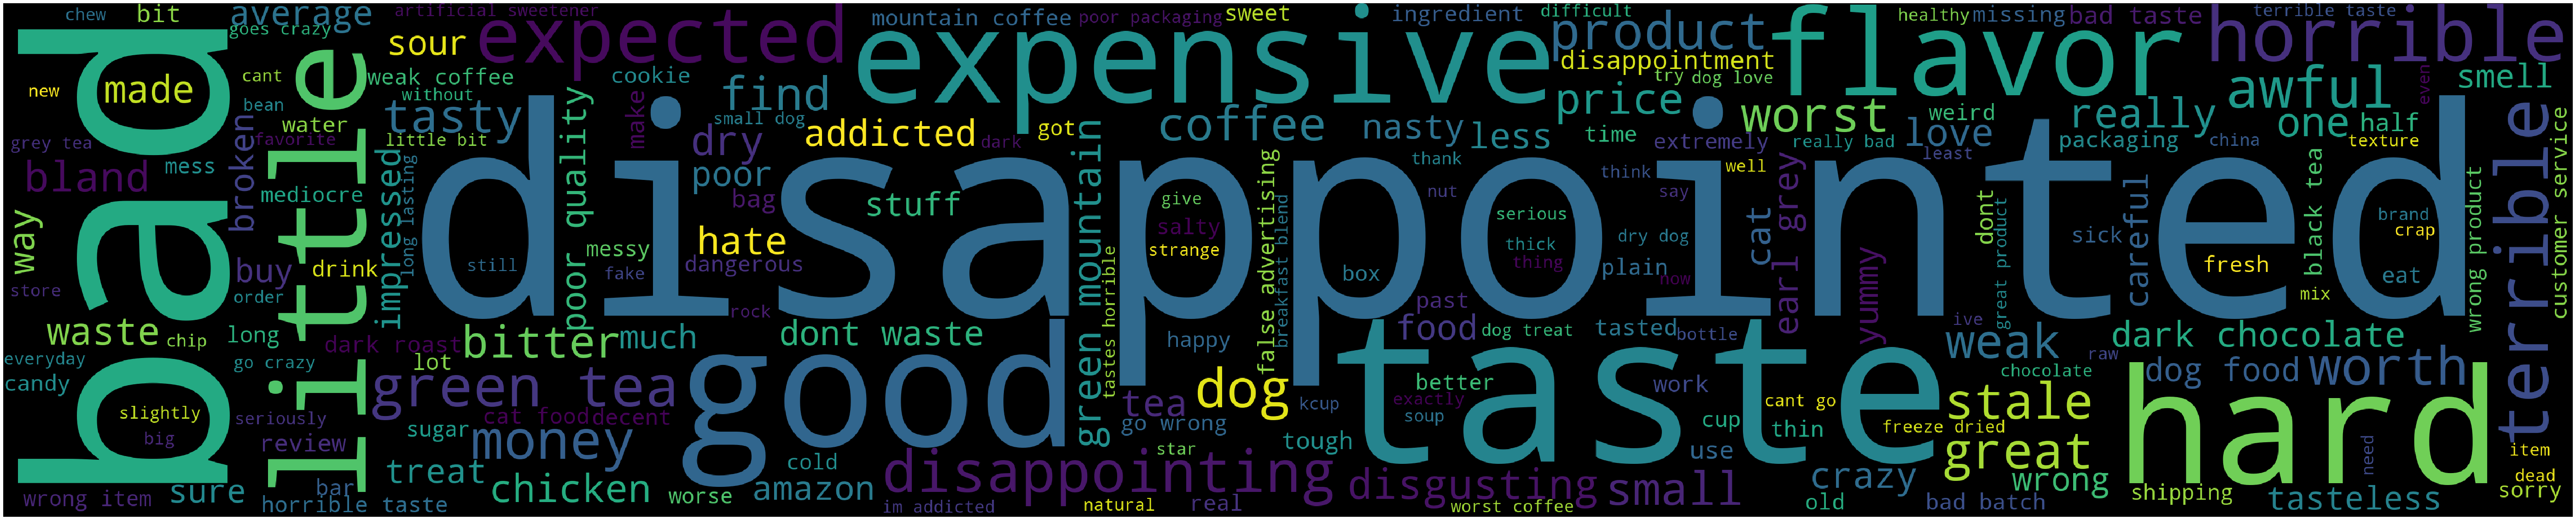

In [250]:
plt.figure(figsize=(100,100))
wordcloud_negative = WordCloud(width=5000, height=1000, stopwords=stop_words).generate(negative_summary)
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

### Which Users should Amazon recommend more products ?

In [251]:
review_df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,I have bought several of the Vitality canned d...,good quality dog food,0.7


In [252]:
## Grouping the Dataset by UserId
recommend_users = review_df.groupby('UserId').agg({'Summary':'count', 'Text':'count', 'ProductId':'count', 'Score':'mean'}).sort_values(by='ProductId', ascending=False)

In [253]:
recommend_users

,Summary,Text,ProductId,Score
UserId,,,,
A3OXHLG6DIBRW8,448,448,448,4.535714
A1YUL9PCJR3JTY,421,421,421,4.494062
AY12DBB0U420B,389,389,389,4.647815
A281NPSIMI1C2R,365,365,365,4.841096
A1Z54EM24Y40LL,256,256,256,4.453125
...,...,...,...,...
A2HROR28DMJV2W,1,1,1,5.000000
A2HRR8CO2Y20G8,1,1,1,5.000000
A2HRSML93IK9TR,1,1,1,5.000000


In [254]:
## Changing the column name
recommend_users.columns = ['total_summary','total_text', 'products_purchased', 'mean_of_score']

In [255]:
recommend_users.head()

,total_summary,total_text,products_purchased,mean_of_score
UserId,,,,
A3OXHLG6DIBRW8,448,448,448,4.535714
A1YUL9PCJR3JTY,421,421,421,4.494062
AY12DBB0U420B,389,389,389,4.647815
A281NPSIMI1C2R,365,365,365,4.841096
A1Z54EM24Y40LL,256,256,256,4.453125


In [256]:
## Top 10 Users Amazon should recommend more products
top_10_users = recommend_users[0:10].reset_index()
top_10_users

,UserId,total_summary,total_text,products_purchased,mean_of_score
0,A3OXHLG6DIBRW8,448,448,448,4.535714
1,A1YUL9PCJR3JTY,421,421,421,4.494062
2,AY12DBB0U420B,389,389,389,4.647815
3,A281NPSIMI1C2R,365,365,365,4.841096
4,A1Z54EM24Y40LL,256,256,256,4.453125
5,A1TMAVN4CEM8U8,204,204,204,4.833333
6,A2MUGFV2TDQ47K,201,201,201,3.751244
7,A3TVZM3ZIXG8YW,199,199,199,1.000000
8,A3PJZ8TU8FDQ1K,178,178,178,4.601124
9,AQQLWCMRNDFGI,176,176,176,3.954545


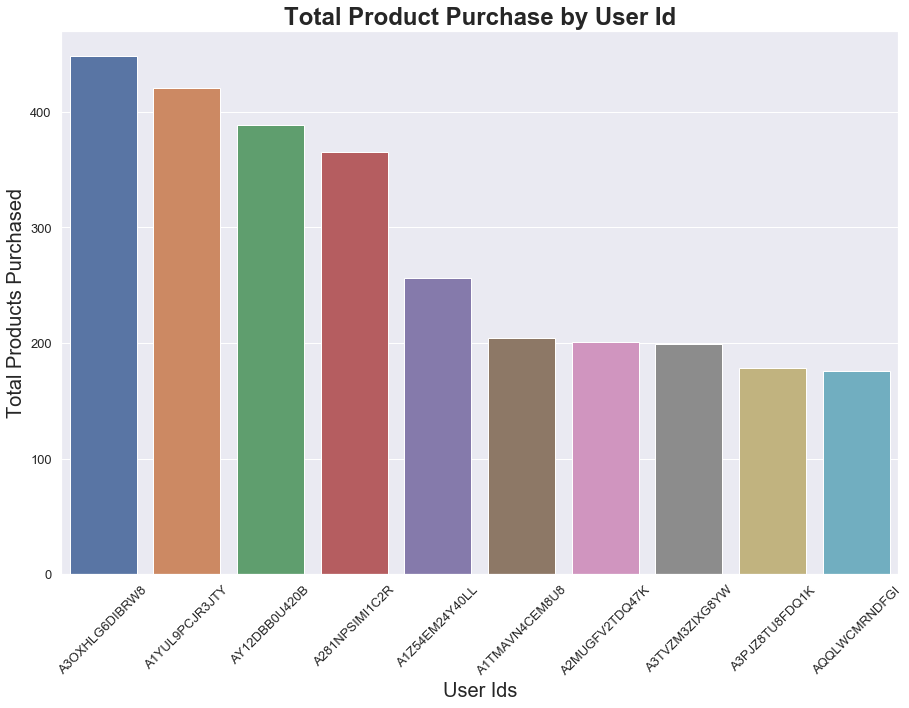

In [257]:
plt.figure(figsize=(15,10))

sns.barplot(x=top_10_users['UserId'], y=top_10_users['products_purchased'])

plt.xlabel('User Ids', fontsize = 20)
plt.xticks(fontsize=13, rotation=45)
plt.ylabel('Total Products Purchased', fontsize = 20)
plt.yticks(fontsize=13)
plt.title('Total Product Purchase by User Id', fontsize = 24, fontweight = 'bold')

plt.show()

### Cleaning the Text Column

In [270]:
## Converting the Text Columns into Lowercase

review_df['Text'] = review_df['Text'].str.lower()

In [259]:
review_df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,good quality dog food,0.7


In [272]:
## Storing a sample record from the Text Column into the text

text=review_df['Text'][164]
text

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [273]:
## Removing the puncutation in the record by passing it to the method

re.sub(r'[^\w\s]', '', text)

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [274]:
## Creating a for loop to remove the puncuation from all the records and then stroing it into a new series

Text_Cleaned = []

for char in review_df['Text']:
    Text_Cleaned.append(re.sub(r'[^\w\s]', '', char))

In [275]:
## Checking the length of the new series

len(Text_Cleaned)

568411

In [276]:
## Checking the first 5 records of the new series

Text_Cleaned[0:5]

['i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most',
 'product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo',
 'this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar  and it is a tiny mouthful of heaven  not too chewy and very flavorful  i highly recommend this yummy treat  if you are familiar with the story of cs lewis the lion the witch and the wardrobe  this is the treat that seduces edmund into selling out his brother and sisters to the witch',
 'if you are looking for the secret ingredient in r

In [277]:
## Removing Extra Spaces in the data

Text_cleaned = []

for char in Text_Cleaned:
    Text_cleaned.append(re.sub(' +', ' ',char))

In [278]:
## Checking the first 5 records of the new series

Text_cleaned[0:5]

['i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most',
 'product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo',
 'this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of cs lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch',
 'if you are looking for the secret ingredient in robitussi

In [279]:
## Storing the cleaned Series back to the original DataFrame

review_df['Text_Cleaned'] = Text_cleaned

In [280]:
review_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity,Text_Cleaned
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,good quality dog food,0.7,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,not as advertised,0.0,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,delight says it all,0.0,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,cough medicine,0.0,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price. there was a wid...,great taffy,0.8,great taffy at a great price there was a wide ...


## Checking for Hyperlinks in the Text_Cleaned Column

In [284]:
## Checking the no.of records having URLs in them

review_df['Text_Cleaned'].str.contains('http|href').sum()

11682

In [285]:
review_df[review_df['Text_Cleaned'].str.contains('http|href')]['Text_Cleaned']

21        i bought these for my husband who is currently...
25        product received is as advertisedbr br a hrefh...
39        i ordered this for my wife as it was reccomend...
348       these are delicious the chocolate is excellent...
369       green mountain nantucket blend kcups make a ve...
                                ...                        
568185    i recently tried some very expensive highly re...
568285    a hrefhttpwwwamazoncomgpproductb001izhzjanestl...
568310    if you are looking for a tasty snack look no f...
568407    my 6 month old male tuxedo cat likes premium e...
568422    this version of pacific chai is pretty mild i ...
Name: Text_Cleaned, Length: 11682, dtype: object

In [287]:
## Printing a sample record from the Dataset 

review_df['Text_Cleaned'][21]

'i bought these for my husband who is currently overseas he loves these and apparently his staff likes them alsobr there are generous amounts of twizzlers in each 16ounce bag and this was well worth the price a hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack of 6a'

In [288]:
## Removing the URLs from the sample record

url_pattern = re.compile(r'href|http.\w+')
url_pattern.sub(r'',review_df['Text_Cleaned'][21])

'i bought these for my husband who is currently overseas he loves these and apparently his staff likes them alsobr there are generous amounts of twizzlers in each 16ounce bag and this was well worth the price a  strawberry 16ounce bags pack of 6a'

In [289]:
## Creating a function to loop over entire Text_Cleaned Column in the DataFrame

def remove_urls(string):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'',string)

In [290]:
## Calling the function and Storing the Cleaned Data back in Original Text_Cleaned Column of the DataFrame

review_df['Text_Cleaned'] = review_df['Text_Cleaned'].apply(remove_urls)

## Removing Stop words from the Text Column

In [291]:
## Importing Natural Language Toolkit 

from nltk.corpus import stopwords

In [292]:
# Storing a sample text record

sample = Text_Cleaned[0]
sample

'i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most'

In [293]:
## Removing all the stop words from the sample text

non_stopwords = [word for word in sample.split(' ') if word not in set(stopwords.words('english'))]
non_stopwords

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better',
 '']

In [294]:
## Combining all the above non stop words back to form a single string using for loop

final_str = ''

for word in non_stopwords:
    final_str = final_str + word
    final_str = final_str + ' '
    
final_str

'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better  '

In [295]:
## Creating a sample DataFrame as the Original Dataframe is too large to run the above process

sample_df = review_df[0:5000]

In [296]:

sample_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity,Text_Cleaned
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,good quality dog food,0.7,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,not as advertised,0.0,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,delight says it all,0.0,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,cough medicine,0.0,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price. there was a wid...,great taffy,0.8,great taffy at a great price there was a wide ...


In [297]:
## Creating a function to remove the stop words in the Text_cleaned Columns

def remove_stopwords(string):
    return ' '.join([word for word in string.split(' ') if word not in set(stopwords.words('english'))])

In [298]:
## Calling the function and Storing back the cleaned data back into the new column of the DataFrame

sample_df['Text_Cleaned_non_stopwords'] = sample_df['Text_Cleaned'].apply(remove_stopwords)

C:\Users\Tanmay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [299]:
sample_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Clean_Summary,SummaryPolarity,Text_Cleaned,Text_Cleaned_non_stopwords
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,good quality dog food,0.7,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,not as advertised,0.0,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,delight says it all,0.0,this is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,cough medicine,0.0,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price. there was a wid...,great taffy,0.8,great taffy at a great price there was a wide ...,great taffy great price wide assortment yummy ...
